In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("ElectricCarData_Clean.csv")

df.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5.0,55480.0
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5.0,30000.0
2,Polestar,2,4.7,210.0,400.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5.0,56440.0
3,BMW,iX3,6.8,180.0,360.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5.0,68040.0
4,Honda,e,9.5,145.0,170.0,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4.0,32997.0


In [3]:
# Replace '-' with NaN
df.replace("-", np.nan, inplace=True)

# Convert FastCharge_KmH to numeric
df["FastCharge_KmH"] = pd.to_numeric(df["FastCharge_KmH"], errors="coerce")

# Drop rows with missing values
df.dropna(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            98 non-null     object 
 1   Model            98 non-null     object 
 2   AccelSec         98 non-null     float64
 3   TopSpeed_KmH     98 non-null     float64
 4   Range_Km         98 non-null     float64
 5   Efficiency_WhKm  98 non-null     object 
 6   FastCharge_KmH   98 non-null     float64
 7   RapidCharge      98 non-null     object 
 8   PowerTrain       98 non-null     object 
 9   PlugType         98 non-null     object 
 10  BodyStyle        98 non-null     object 
 11  Segment          98 non-null     object 
 12  Seats            98 non-null     float64
 13  PriceEuro        98 non-null     float64
dtypes: float64(6), object(8)
memory usage: 11.5+ KB


In [4]:
y = df["Range_Km"]


In [5]:
X = df[
    [
        "AccelSec",
        "TopSpeed_KmH",
        "Efficiency_WhKm",
        "FastCharge_KmH",
        "Seats",
        "PriceEuro"
    ]
]


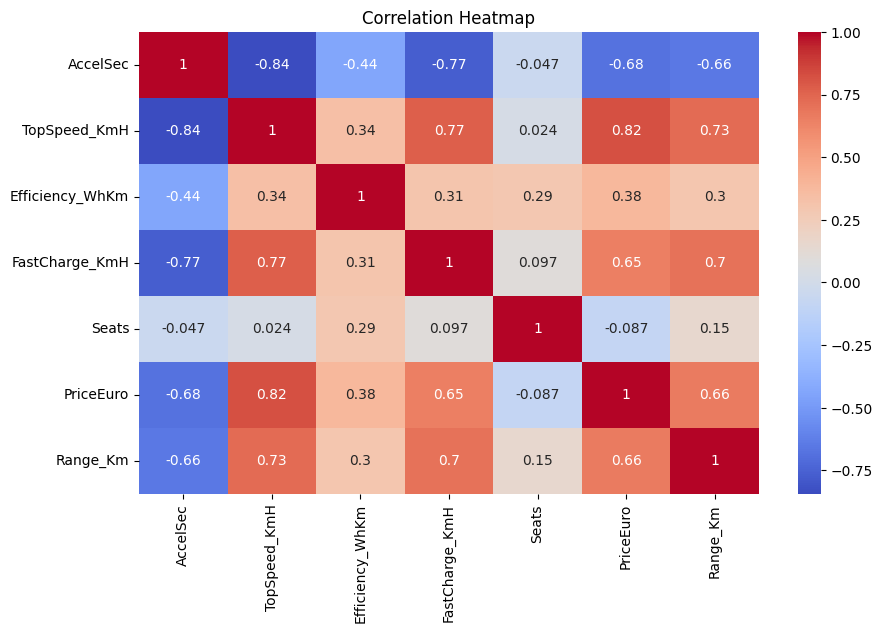

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df[X.columns.tolist() + ["Range_Km"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


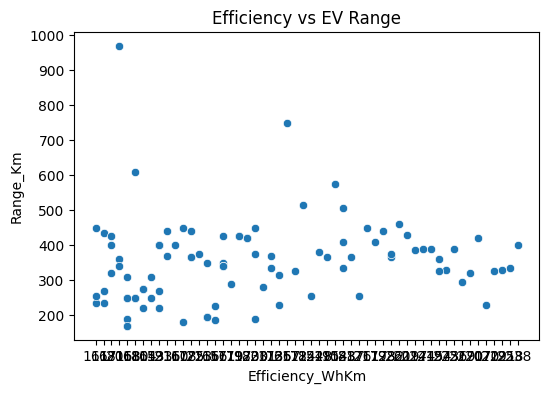

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Efficiency_WhKm"], y=df["Range_Km"])
plt.title("Efficiency vs EV Range")
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Performance")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Performance
R2 Score: 0.5369247677344132
MAE: 47.130991795212275
RMSE: 58.006074144366586


In [10]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Performance
R2 Score: 0.7630876857968621
MAE: 32.765
RMSE: 41.48981652164781


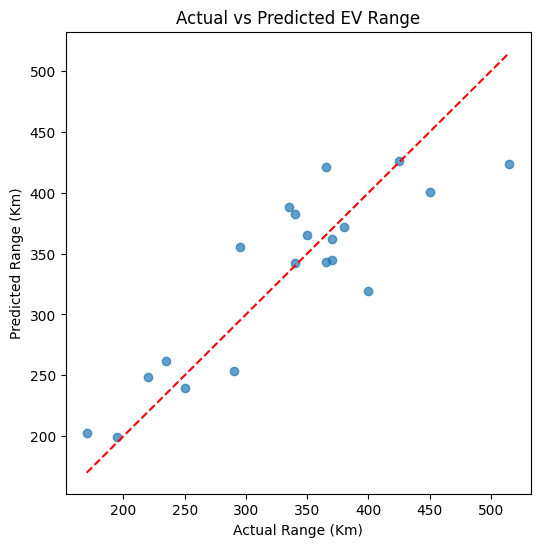

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("Actual Range (Km)")
plt.ylabel("Predicted Range (Km)")
plt.title("Actual vs Predicted EV Range")
plt.show()


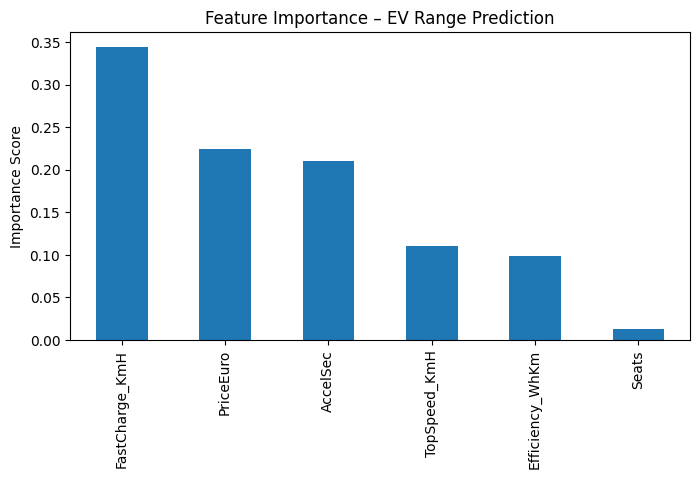

In [12]:
importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,4))
importance.plot(kind="bar")
plt.title("Feature Importance – EV Range Prediction")
plt.ylabel("Importance Score")
plt.show()


In [13]:
predictions = pd.DataFrame({
    "Actual_Range_Km": y_test.values,
    "Predicted_Range_Km": y_pred_rf
})

predictions.to_csv("predictions.csv", index=False)
